In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

def minLJR(r, mini):
    for e in r:
        if LJ(e) == mini:
            return e

In [3]:
r = np.linspace(1.0, 3.0, 100)

<function matplotlib.pyplot.show(close=None, block=None)>

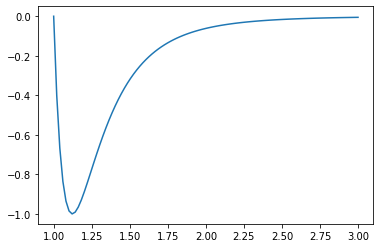

In [4]:
#Uhh, I kinda don't remember this, but I'll try something
d = list()
for r1 in r:
    for r2 in r:
        d.append(np.sqrt(r1**2+r2**2))
        
plt.plot(r, LJ(r))
plt.show

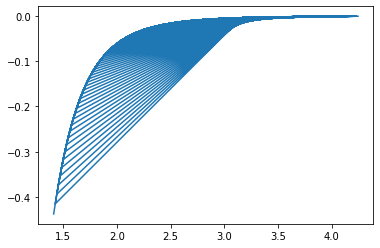

In [5]:
plt.plot(np.array(d), LJ(np.array(d)))
plt.show()

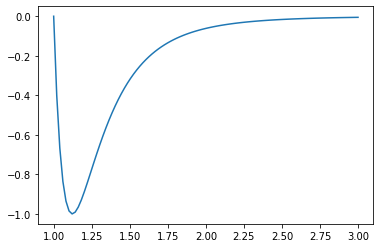

In [6]:
#Okay, so the above code does not work, but we are trying to graph the ground state of three molecules,
#so this is what i'm thinking
#
#   x
#   |
#   | 
#   x------x
#
#These are set at the same distance, and then you move the third particle to the the mid point of the base line
#and from there you can see what potential makes this configuration the smallest, where each leg is starting at an
#equal distance

r = np.linspace(1.0, 3.0, 100)
plt.plot(r, LJ(r))
plt.show()

minTwo = min(LJ(r)) #This is the minimum potential between two points
minDist = minLJR(r, minTwo) #This is the minimum distance between the two points

In [7]:
#Setup the initial configuration, where it's an isoceles triangle like in the previous comment
D = minDist #This will not change
d1 = minDist
d2 = (2*d1**2)**(0.5)

d1Angel = 90 * (np.pi/180)#This one needs to be subtracted from
d2Angel = 45 * (np.pi/180) #This one needs to be added to
DAngel = 45 * (np.pi/180)#This one will just be the difference of 180 - (d1Angle + d2Angle)
oneDeg = 1 * (np.pi/180)
ninety = 90 * (np.pi/180)

print(D, d1, d2)

1.121212121212121 1.121212121212121 1.5856333881152882


In [8]:
def sineRule(b,a,opp):
    return opp*(np.sin(a)/np.sin(b))

In [9]:
#The condition to stop will be when d1 equals d2
potentials = [[], []]
c = 0
while d1 != d2 and c != 45:
    potentials[0].append(LJ(d1))
    potentials[1].append(LJ(d2))
    d1Angel -= oneDeg
    d2Angel += oneDeg
    DAngel = 180 - (d1Angel + d2Angel)
    d1 = sineRule(DAngel, d2Angel, D)
    d2 = sineRule(DAngel, d1Angel, D)
    c+=1

In [10]:
print(potentials)

[[-0.999955009866677, 32.95871387978688, 25.848223002393553, 20.30658596276638, 15.965797156906834, 12.54961178605817, 9.849325652239497, 7.70628921469816, 5.999192495686534, 4.634755259873479, 3.5408652917674246, 2.6614888338335874, 1.9528724179467174, 1.3806917728840347, 0.9178995712563429, 0.5430919010337858, 0.23926196678358913, -0.007155550618810125, -0.20702080624887476, -0.3690587542815069, -0.5003023213813353, -0.606438481942301, -0.6920796317033071, -0.7609772350259911, -0.8161906720936116, -0.8602211733872633, -0.8951184372369616, -0.9225657903207378, -0.9439484301228804, -0.9604082789792985, -0.9728882047396243, -0.9821677662128605, -0.9888921798071073, -0.9935958451291365, -0.9967214876588404, -0.9986357576993861, -0.9996419527465901, -0.9999903946240707, -0.9998868850688397, -0.9994995776663286, -0.9989645352791647, -0.9983901866181314, -0.9978608504098407, -0.9974394583860914, -0.9971695771856813], [-0.23584155575774562, -0.9971695771856813, -0.9974394583860914, -0.997860

In [11]:
print(min(potentials[0]))
print(min(potentials[1]))

-0.9999903946240707
-0.9999903946240707


In [12]:
#I guess, in this mis-mash of bad ideas, this would be my final potential
print(minTwo + min(potentials[0]) + min(potentials[1]))

-2.9999357991148186


In [13]:
#Will try and graph these later